# Solution of Schrodinger's 1D wave equation for Simple Harmonic Oscillator potential
Numerov Method

Enter the number of nodes :  2
Enter the maximum energy value :  10


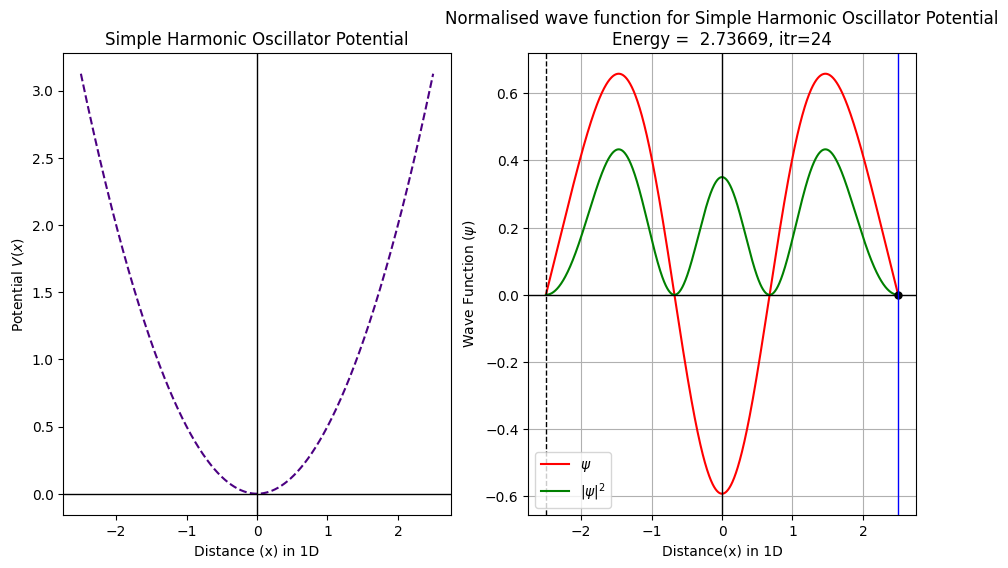

The Eigen-Energy satisfying the boundary condition is 2.7366884529590605


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simpson


#Define the dimensionless potential
def V(x):
    omega=1
    return x**2/2

nodes=int(input('Enter the number of nodes : ')) 
  
#Boundary conditions for a wave function
x0,y0,xn,yn=-2.5,0,2.5,0
n=1000
x,h=np.linspace(x0,xn,n,retstep='True')
psi=np.zeros(n)
psi[0],psi[1]=0,0.001

#Numerov method with shooting parameter E as energy
def SHO(E):
    k=2*(E-V(x))            #Parameter from Time Independent Schrodinger Equation
    for i in range(1,n-1):   
       psi[i+1]=(2*(1-(5/12)*h**2*k[i])*psi[i]-(1+(1/12)*h**2*k[i-1])*psi[i-1])/(1+(1/12)*h**2*k[i+1])
    return psi 



#Bisection method for proper choice of energy
D=eval(input('Enter the maximum energy value : '))
energies=np.arange(0,D,0.1)
H=[]
for i in energies:
    hits=SHO(i)[-1]
    H.append(hits)
    
plt.figure(figsize=(11,6))
Eigen_Energy=[]
for i in range(1,len(energies)):
    a=np.signbit(H[i-1])
    b=np.signbit(H[i])
    if a!=b:
        E1=energies[i-1]
        E2=energies[i]
        itr=0.0
        while True:
            E3=(E1+E2)/2
            if SHO(E3)[-1]==0:
                break
            if SHO(E1)[-1]*SHO(E3)[-1]>0:
                E1=E3
            else:
                E2=E3
            itr=itr+1
            acc=abs(E1-E2)
            if acc<0.00000001:
                break
        Eigen_Energy.append(E3)

        
#Normalisation of wave function
N=1/np.sqrt(simpson(SHO(Eigen_Energy[nodes])*SHO(Eigen_Energy[nodes]),x=x))
solution=N*SHO(Eigen_Energy[nodes])

#Plotting and printing
plt.subplot(121)
plt.plot(x,V(x),'--',color='indigo')
plt.ylabel(r'Potential $V(x)$')
plt.xlabel('Distance (x) in 1D')
plt.title('Simple Harmonic Oscillator Potential')
plt.axhline(color='black',lw=1)
plt.axvline(color='black',lw=1)
   
plt.subplot(122)
plt.plot(x,solution,'r',lw=1.5,label=r'$\psi$')
plt.plot(x,solution**2,'g',lw=1.5,label=r'$|\psi|^2$')
plt.plot(x[-1],SHO(Eigen_Energy[nodes])[-1],'o',color='black',ms=5)
plt.title('Normalised wave function for Simple Harmonic Oscillator Potential\n'+r'Energy =%9.5f, itr=%2i'%(Eigen_Energy[nodes],itr))
plt.xlabel('Distance(x) in 1D')
plt.ylabel(r'Wave Function ($\psi$)')
plt.axhline(color='black',lw=1)
plt.axvline(color='black',lw=1)
plt.axvline(x=x0,color='black',lw=1,ls='--')
plt.axvline(x=xn,color='blue',lw=1)
plt.grid()
plt.legend(loc='best',prop={'size':10}) 
plt.show()
print('The Eigen-Energy satisfying the boundary condition is',Eigen_Energy[nodes])

# Solution of Schrodinger's 1D wave equation for Anharmonic Oscillator potential
Numerov Method

Enter the number of nodes :  0
Enter the maximum energy value :  10


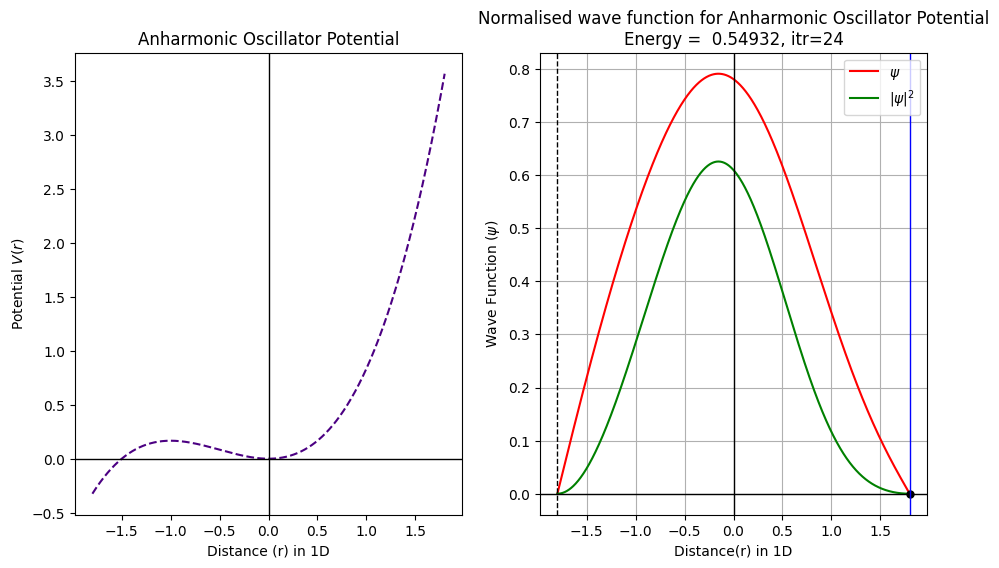

The Eigen-Energy satisfying the boundary condition is 0.5493249237537384


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simpson


#Define the dimensionless potential
def V(r):
    b=1
    k=1
    return (k*r**2)/2+(b*r**3)/3

nodes=int(input('Enter the number of nodes : '))  
   
#Boundary conditions for a wave function
r0,y0,rn,yn=-1.8,0,1.8,0
n=1000
r,h=np.linspace(r0,rn,n,retstep='True')
psi=np.zeros(n)
psi[0],psi[1]=0,0.001

#Numerov method with shooting parameter E as energy
def AHO(E):
    k=2*(E-V(r))            #Parameter from Time Independent Schrodinger Equation
    for i in range(1,n-1):   
       psi[i+1]=(2*(1-(5/12)*h**2*k[i])*psi[i]-(1+(1/12)*h**2*k[i-1])*psi[i-1])/(1+(1/12)*h**2*k[i+1])
    return psi 



#Bisection method for proper choice of energy
D=eval(input('Enter the maximum energy value : '))
energies=np.arange(0,D,0.1)
H=[]
for i in energies:
    hits=AHO(i)[-1]
    H.append(hits)
    
plt.figure(figsize=(11,6))
Eigen_Energy=[]
for i in range(1,len(energies)):
    a=np.signbit(H[i-1])
    b=np.signbit(H[i])
    if a!=b:
        E1=energies[i-1]
        E2=energies[i]
        itr=0.0
        while True:
            E3=(E1+E2)/2
            if AHO(E3)[-1]==0:
                break
            if AHO(E1)[-1]*AHO(E3)[-1]>0:
                E1=E3
            else:
                E2=E3
            itr=itr+1
            acc=abs(E1-E2)
            if acc<0.00000001:
                break
        Eigen_Energy.append(E3)

        
#Normalisation of wave function
N=1/np.sqrt(simpson(AHO(Eigen_Energy[nodes])*AHO(Eigen_Energy[nodes]),x=r))
solution=N*AHO(Eigen_Energy[nodes])

#Plotting and printing
plt.subplot(121)
plt.plot(r,V(r),'--',color='indigo')
plt.ylabel(r'Potential $V(r)$')
plt.xlabel('Distance (r) in 1D')
plt.title('Anharmonic Oscillator Potential')
plt.axhline(color='black',lw=1)
plt.axvline(color='black',lw=1)
   
plt.subplot(122)
plt.plot(r,solution,'r',lw=1.5,label=r'$\psi$')
plt.plot(r,solution**2,'g',lw=1.5,label=r'$|\psi|^2$')
plt.plot(r[-1],AHO(Eigen_Energy[nodes])[-1],'o',color='black',ms=5)
plt.title('Normalised wave function for Anharmonic Oscillator Potential\n'+r'Energy =%9.5f, itr=%2i'%(Eigen_Energy[nodes],itr))
plt.xlabel('Distance(r) in 1D')
plt.ylabel(r'Wave Function ($\psi$)')
plt.axhline(color='black',lw=1)
plt.axvline(color='black',lw=1)
plt.axvline(x=r0,color='black',lw=1,ls='--')
plt.axvline(x=rn,color='blue',lw=1)
plt.grid()
plt.legend(loc='best',prop={'size':10}) 
 
plt.show()
print('The Eigen-Energy satisfying the boundary condition is',Eigen_Energy[nodes])

# Solution of Schrodinger's 1D wave equation for Coulomb potential
Numerov Method

Enter the number of nodes :  0


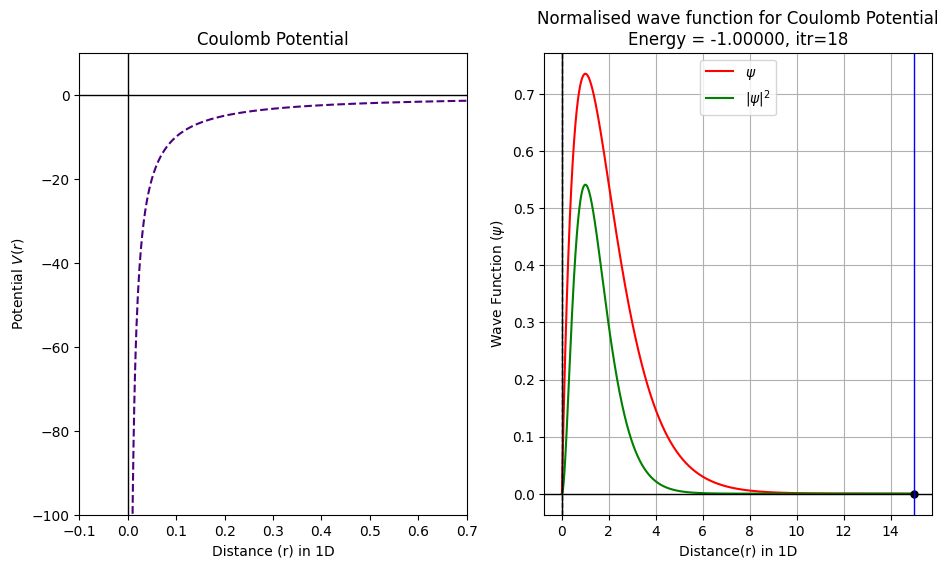

The Eigen-Energy satisfying the boundary condition is -0.9999981002807615


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simpson


#Define the dimensionless potential
def V(r):
    return -1/r

nodes=int(input('Enter the number of nodes : '))     
    
#Boundary conditions for a wave function
#Large end point to capture many Coulomb Potential states before infinite well states (positive energies) take over when the system actually responds to the finite boundary conditions for higher excited states
#Larger the boundary, more tolerance required for wavefunction to converge
r0,y0,rn,yn=1e-7,0,15,0
#r0,y0,rn,yn=1e-12,0,200,0
n=10000
r,h=np.linspace(r0,rn,n,retstep=True)
psi=np.zeros(n)
psi[0],psi[1]=0,0.001

#Numerov method with shooting parameter E as energy
def Coulomb(E):
    k=2*(E/2-V(r))            #Parameter from Time Independent Schrodinger Equation
    for i in range(1,n-1):   
       psi[i+1]=(2*(1-(5/12)*h**2*k[i])*psi[i]-(1+(1/12)*h**2*k[i-1])*psi[i-1])/(1+(1/12)*h**2*k[i+1])
    return psi 



#Bisection method for proper choice of energy
#Energies are negative (-1/n**2) with maximum value of -1.0 (scaled system) for the Coulomb Potential
energies=np.arange(-1.2,0,0.002)
H=[]
for i in energies:
    hits=Coulomb(i)[-1]
    H.append(hits)

plt.figure(figsize=(11,6))
Eigen_Energy=[]
for i in range(1,len(energies)):
    a=np.signbit(H[i-1])
    b=np.signbit(H[i])
    if a!=b:
        E1=energies[i-1]
        E2=energies[i]
        itr=0.0
        while True:
            E3=(E1+E2)/2
            if Coulomb(E3)[-1]==0:
                break
            if Coulomb(E1)[-1]*Coulomb(E3)[-1]>0:
                E1=E3
            else:
                E2=E3
            itr=itr+1
            acc=abs(E1-E2)
            if acc<0.00000001:
                break
        Eigen_Energy.append(E3)

        
#Normalisation of wave function
N=1/np.sqrt(simpson(Coulomb(Eigen_Energy[nodes])*Coulomb(Eigen_Energy[nodes]),x=r))
solution=N*Coulomb(Eigen_Energy[nodes])

#Plotting and printing
plt.subplot(121)
plt.plot(r,V(r),'--',color='indigo')
plt.ylabel(r'Potential $V(r)$')
plt.xlabel('Distance (r) in 1D')
plt.title('Coulomb Potential')
plt.xlim(-0.1,0.7)
plt.ylim(-100,10)
plt.axhline(color='black',lw=1)
plt.axvline(color='black',lw=1)
   
plt.subplot(122)
plt.plot(r,solution,'r',lw=1.5,label=r'$\psi$')
plt.plot(r,solution**2,'g',lw=1.5,label=r'$|\psi|^2$')
plt.plot(r[-1],Coulomb(Eigen_Energy[nodes])[-1],'o',color='black',ms=5)
plt.title('Normalised wave function for Coulomb Potential\n'+r'Energy =%9.5f, itr=%2i'%(Eigen_Energy[nodes],itr))
plt.xlabel('Distance(r) in 1D')
plt.ylabel(r'Wave Function ($\psi$)')
plt.axhline(color='black',lw=1)
plt.axvline(color='black',lw=1)
plt.axvline(x=r0,color='black',lw=1,ls='--')
plt.axvline(x=rn,color='blue',lw=1)
plt.grid()
plt.legend(loc='best',prop={'size':10}) 

plt.show()
print('The Eigen-Energy satisfying the boundary condition is',Eigen_Energy[nodes])

# Solution of Schrodinger's 1D wave equation for Yukawa potential
Numerov Method

Enter the number of nodes :  1
Enter the maximum energy value :  10


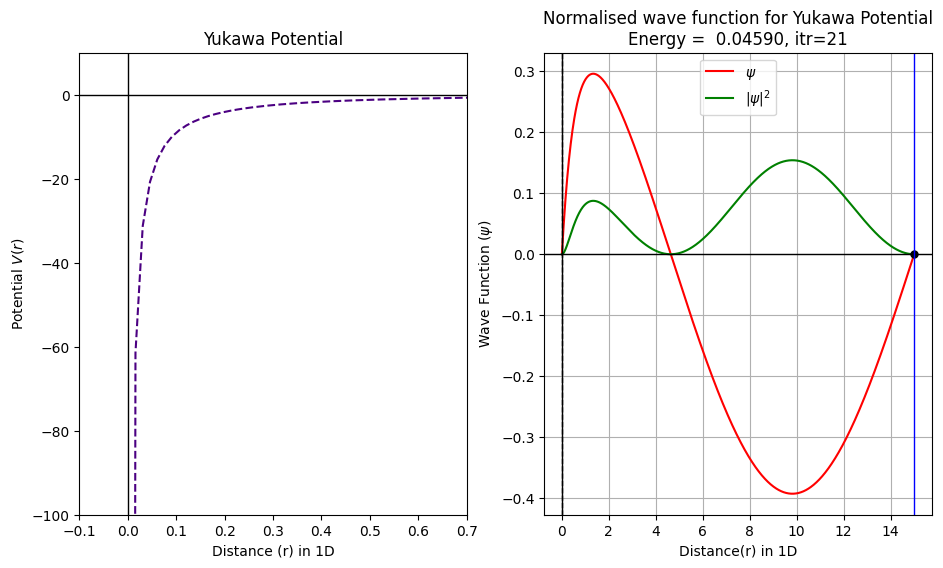

The Eigen-Energy satisfying the boundary condition is 0.04590388298013254


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simpson


#Define the dimensionless potential
def V(r):
    b=1
    return -(1/r)*np.exp(-r/b)

nodes=int(input('Enter the number of nodes : '))      

#Boundary conditions for a wave function
r0,y0,rn,yn=0.001,0,15,0
n=1000
r,h=np.linspace(r0,rn,n,retstep='True')
psi=np.zeros(n)
psi[0],psi[1]=0,0.001

#Numerov method with shooting parameter E as energy
def Yukawa(E):
    k=2*(E-V(r))            #Parameter from Time Independent Schrodinger Equation
    for i in range(1,n-1):   
       psi[i+1]=(2*(1-(5/12)*h**2*k[i])*psi[i]-(1+(1/12)*h**2*k[i-1])*psi[i-1])/(1+(1/12)*h**2*k[i+1])
    return psi 



#Bisection method for proper choice of energy
#Energies are negative (but finite) if Yukawa Potential supports bound states but the system here allows positive energies for bound states  as it is bounded from both ends with infinite potential at finite distance
D=eval(input('Enter the maximum energy value : '))
energies=np.arange(-10,D,0.02)
H=[]
for i in energies:
    hits=Yukawa(i)[-1]
    H.append(hits)
    
plt.figure(figsize=(11,6))
Eigen_Energy=[]
for i in range(1,len(energies)):
    a=np.signbit(H[i-1])
    b=np.signbit(H[i])
    if a!=b:
        E1=energies[i-1]
        E2=energies[i]
        itr=0.0
        while True:
            E3=(E1+E2)/2
            if Yukawa(E3)[-1]==0:
                break
            if Yukawa(E1)[-1]*Yukawa(E3)[-1]>0:
                E1=E3
            else:
                E2=E3
            itr=itr+1
            acc=abs(E1-E2)
            if acc<0.00000001:
                break
        Eigen_Energy.append(E3)

        
#Normalisation of wave function
N=1/np.sqrt(simpson(Yukawa(Eigen_Energy[nodes])*Yukawa(Eigen_Energy[nodes]),x=r))
solution=N*Yukawa(Eigen_Energy[nodes])

#Plotting and printing
plt.subplot(121)
plt.plot(r,V(r),'--',color='indigo')
plt.ylabel(r'Potential $V(r)$')
plt.xlabel('Distance (r) in 1D')
plt.title('Yukawa Potential')
plt.xlim(-0.1,0.7)
plt.ylim(-100,10)
plt.axhline(color='black',lw=1)
plt.axvline(color='black',lw=1)
   
plt.subplot(122)
plt.plot(r,solution,'r',lw=1.5,label=r'$\psi$')
plt.plot(r,solution**2,'g',lw=1.5,label=r'$|\psi|^2$')
plt.plot(r[-1],Yukawa(Eigen_Energy[nodes])[-1],'o',color='black',ms=5)
plt.title('Normalised wave function for Yukawa Potential\n'+r'Energy =%9.5f, itr=%2i'%(Eigen_Energy[nodes],itr))
plt.xlabel('Distance(r) in 1D')
plt.ylabel(r'Wave Function ($\psi$)')
plt.axhline(color='black',lw=1)
plt.axvline(color='black',lw=1)
plt.axvline(x=r0,color='black',lw=1,ls='--')
plt.axvline(x=rn,color='blue',lw=1)
plt.grid()
plt.legend(loc='best',prop={'size':10}) 

plt.show()
print('The Eigen-Energy satisfying the boundary condition is',Eigen_Energy[nodes])

# Solution of Schrodinger's 1D wave equation for Morse potential
Numerov Method

Enter the number of nodes :  1
Enter the maximum energy value :  10


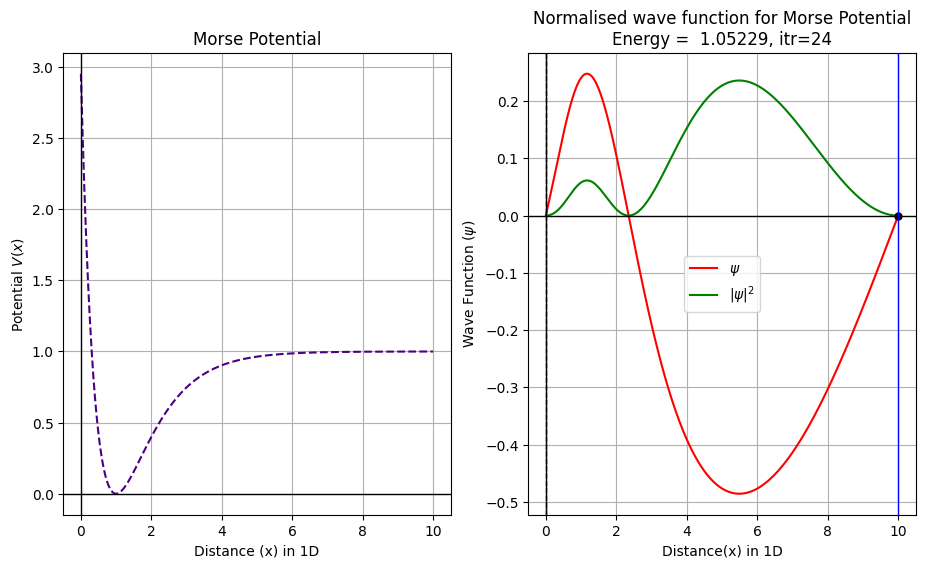

The Eigen-Energy satisfying the boundary condition is 1.0522943913936618


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simpson


#Define the dimensionless potential
def V(x):
    D=1
    b=1
    return D*(1-np.exp(-(x-b)))**2 

nodes=int(input('Enter the number of nodes : '))  
   
#Boundary conditions for a wave function
x0,y0,xn,yn=0,0,10,0
n=1000
x,h=np.linspace(x0,xn,n,retstep='True')
psi=np.zeros(n)
psi[0],psi[1]=0,0.001

#Numerov method with shooting parameter E as energy
def Morse(E):
    k=2*(E-V(x))            #Parameter from Time Independent Schrodinger Equation
    for i in range(1,n-1):   
       psi[i+1]=(2*(1-(5/12)*h**2*k[i])*psi[i]-(1+(1/12)*h**2*k[i-1])*psi[i-1])/(1+(1/12)*h**2*k[i+1])
    return psi 



#Bisection method for proper choice of energy
D=eval(input('Enter the maximum energy value : '))
energies=np.arange(0,D,0.1)
H=[]
for i in energies:
    hits=Morse(i)[-1]
    H.append(hits)
plt.figure(figsize=(11,6))

Eigen_Energy=[]
for i in range(1,len(energies)):
    a=np.signbit(H[i-1])
    b=np.signbit(H[i])
    if a!=b:
        E1=energies[i-1]
        E2=energies[i]
        itr=0.0
        while True:
            E3=(E1+E2)/2
            if Morse(E3)[-1]==0:
                break
            if Morse(E1)[-1]*Morse(E3)[-1]>0:
                E1=E3
            else:
                E2=E3
            itr=itr+1
            acc=abs(E1-E2)
            if acc<0.00000001:
                break
        Eigen_Energy.append(E3)

        
#Normalisation of wave function
N=1/np.sqrt(simpson(Morse(Eigen_Energy[nodes])*Morse(Eigen_Energy[nodes]),x=x))
solution=N*Morse(Eigen_Energy[nodes])

#Plotting and printing
plt.subplot(121)
plt.plot(x,V(x),'--',color='indigo')
plt.ylabel(r'Potential $V(x)$')
plt.xlabel('Distance (x) in 1D')
plt.title('Morse Potential')
plt.grid()
plt.axhline(color='black',lw=1)
plt.axvline(color='black',lw=1)
   
plt.subplot(122)
plt.plot(x,solution,'r',lw=1.5,label=r'$\psi$')
plt.plot(x,solution**2,'g',lw=1.5,label=r'$|\psi|^2$')
plt.plot(x[-1],Morse(Eigen_Energy[nodes])[-1],'o',color='black',ms=5)
plt.title('Normalised wave function for Morse Potential\n'+r'Energy =%9.5f, itr=%2i'%(Eigen_Energy[nodes],itr))
plt.xlabel('Distance(x) in 1D')
plt.ylabel(r'Wave Function ($\psi$)')
plt.axhline(color='black',lw=1)
plt.axvline(color='black',lw=1)
plt.axvline(x=x0,color='black',lw=1,ls='--')
plt.axvline(x=xn,color='blue',lw=1)
plt.grid()
plt.legend(loc='best',prop={'size':10}) 

plt.show()
print('The Eigen-Energy satisfying the boundary condition is',Eigen_Energy[nodes])

# Solution of Schrodinger's 1D wave equation for Square Well potential
Numerov Method

Enter the width of the potential well :  5
Enter the well potential :  0
Enter the number of nodes :  2
Enter the maximum energy value :  40


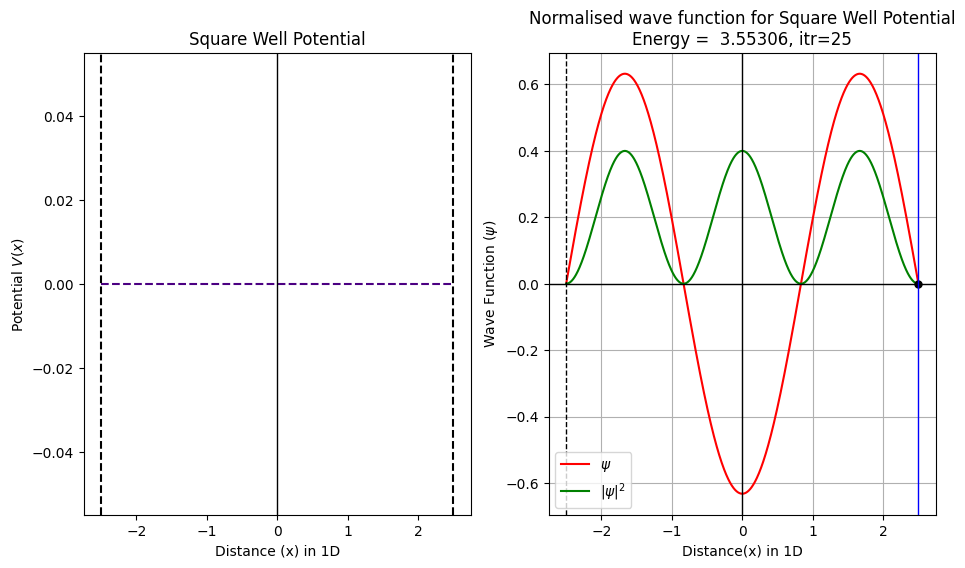

The Eigen-Energy satisfying the boundary condition is 3.5530575811862946


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simpson


#Define the dimensionless potential
def V(x,l,V0):
    k1=0
    return k1*(x)-V0

l=eval(input('Enter the width of the potential well : ' ))
V0=eval(input('Enter the well potential : ' ))
V0=abs(V0)
nodes=int(input('Enter the number of nodes : '))
   
#Boundary conditions for a wave function
x0,y0,xn,yn=-l/2,0,l/2,0
n=1000
x,h=np.linspace(x0,xn,n,retstep='True')
psi=np.zeros(n)
psi[0],psi[1]=0,0.001

#Numerov method with shooting parameter E as energy
def square(E):
    k=(E-V(x,l,V0))            #Parameter from Time Independent Schrodinger Equation
    for i in range(1,n-1):   
       psi[i+1]=(2*(1-(5/12)*h**2*k[i])*psi[i]-(1+(1/12)*h**2*k[i-1])*psi[i-1])/(1+(1/12)*h**2*k[i+1])
    return psi 



#Bisection method for proper choice of energy
D=eval(input('Enter the maximum energy value : '))
energies=np.arange(0,D,0.2)
H=[]
for i in energies:
    hits=square(i)[-1]
    H.append(hits)

plt.figure(figsize=(11,6))
Eigen_Energy=[]
for i in range(1,len(energies)):
    a=np.signbit(H[i-1])
    b=np.signbit(H[i])
    if a!=b:
        E1=energies[i-1]
        E2=energies[i]
        itr=0.0
        while True:
            E3=(E1+E2)/2
            if square(E3)[-1]==0:
                break
            if square(E1)[-1]*square(E3)[-1]>0:
                E1=E3
            else:
                E2=E3
            itr=itr+1
            acc=abs(E1-E2)
            if acc<0.00000001:
                break
        Eigen_Energy.append(E3)

        
#Normalisation of wave function
N=1/np.sqrt(simpson(square(Eigen_Energy[nodes])*square(Eigen_Energy[nodes]),x=x))
solution=N*square(Eigen_Energy[nodes])

#Plotting and printing
plt.subplot(121)
plt.plot(x,V(x,a,V0),'--',color='indigo')
plt.ylabel(r'Potential $V(x)$')
plt.xlabel('Distance (x) in 1D')
plt.title('Square Well Potential')
plt.axvline(color='black',lw=1)
plt.axvline(x=-l/2,color='black',ls='--')
plt.axvline(x=l/2,color='black',ls='--')
    
plt.subplot(122)
plt.plot(x,solution,'r',lw=1.5,label=r'$\psi$')
plt.plot(x,solution**2,'g',lw=1.5,label=r'$|\psi|^2$')
plt.plot(x[-1],square(Eigen_Energy[nodes])[-1],'o',color='black',ms=5)
plt.title('Normalised wave function for Square Well Potential\n'+r'Energy =%9.5f, itr=%2i'%(Eigen_Energy[nodes],itr))
plt.xlabel('Distance(x) in 1D')
plt.ylabel(r'Wave Function ($\psi$)')
plt.axhline(color='black',lw=1)
plt.axvline(color='black',lw=1)
plt.axvline(x=x0,color='black',lw=1,ls='--')
plt.axvline(x=xn,color='blue',lw=1)
plt.grid()
plt.legend(loc='best',prop={'size':10}) 

plt.show()
print('The Eigen-Energy satisfying the boundary condition is',Eigen_Energy[nodes])

# Solution of Schrodinger's 1D wave equation for Triangular potential
Numerov Method

Enter the width of the Triangular well :  5
Enter the slope of the potential :  1
Enter the number of nodes :  2
Enter the maximum energy value :  40


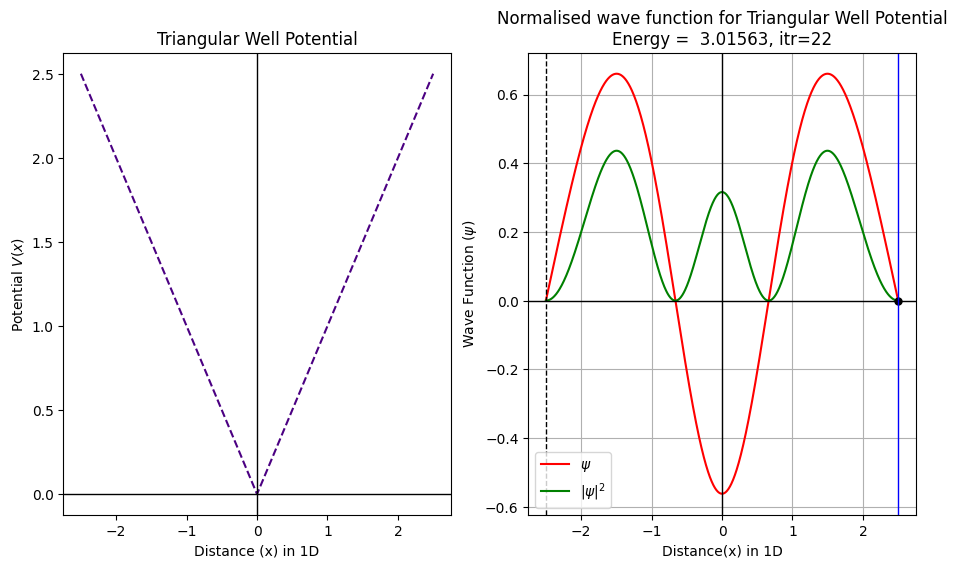

The Eigen-Energy satisfying the boundary condition is 3.0156263574823603


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simpson


#Define the dimensionless potential
def V(k1,x):
        return k1*abs(x)

a=eval(input('Enter the width of the Triangular well : ' ))
k1=eval(input('Enter the slope of the potential : '))
k1=abs(k1)
nodes=int(input('Enter the number of nodes : '))
   
#Boundary conditions for a wave function
x0,y0,xn,yn=-a/2,0,a/2,0
n=1000
x,h=np.linspace(x0,xn,n,retstep='True')
psi=np.zeros(n)
psi[0],psi[1]=0,0.001

#Numerov method with shooting parameter E as energy
def triang(E):
    k=2*(E-V(k1,x))            #Parameter from Time Independent Schrodinger Equation
    for i in range(1,n-1):   
       psi[i+1]=(2*(1-(5/12)*h**2*k[i])*psi[i]-(1+(1/12)*h**2*k[i-1])*psi[i-1])/(1+(1/12)*h**2*k[i+1])
    return psi 


#Bisection method for proper choice of energy
D=eval(input('Enter the maximum energy value : '))
energies=np.linspace(0,D,1000)
H=[]
for i in energies:
    hits=triang(i)[-1]
    H.append(hits)
    
plt.figure(figsize=(11,6))
Eigen_Energy=[]
for i in range(1,len(energies)):
    a=np.signbit(H[i-1])
    b=np.signbit(H[i])
    if a!=b:
        E1=energies[i-1]
        E2=energies[i]
        itr=0.0
        while True:
            E3=(E1+E2)/2
            if triang(E3)[-1]==0:
                break
            if triang(E1)[-1]*triang(E3)[-1]>0:
                E1=E3
            else:
                E2=E3
            itr=itr+1
            acc=abs(E1-E2)
            if acc<0.00000001:
                break
        Eigen_Energy.append(E3)

        
#Normalisation of wave function
N=1/np.sqrt(simpson(triang(Eigen_Energy[nodes])*triang(Eigen_Energy[nodes]),x=x))
solution=N*triang(Eigen_Energy[nodes])

#Plotting and printing
plt.subplot(121)
plt.plot(x,V(k1,x),'--',color='indigo')
plt.ylabel(r'Potential $V(x)$')
plt.xlabel('Distance (x) in 1D')
plt.title('Triangular Well Potential')
plt.axhline(color='black',lw=1)
plt.axvline(color='black',lw=1)
   
plt.subplot(122)
plt.plot(x,solution,'r',lw=1.5,label=r'$\psi$')
plt.plot(x,solution**2,'g',lw=1.5,label=r'$|\psi|^2$')
plt.plot(x[-1],triang(Eigen_Energy[nodes])[-1],'o',color='black',ms=5)
plt.title('Normalised wave function for Triangular Well Potential\n'+r'Energy =%9.5f, itr=%2i'%(Eigen_Energy[nodes],itr))
plt.xlabel('Distance(x) in 1D')
plt.ylabel(r'Wave Function ($\psi$)')
plt.axhline(color='black',lw=1)
plt.axvline(color='black',lw=1)
plt.axvline(x=x0,color='black',lw=1,ls='--')
plt.axvline(x=xn,color='blue',lw=1)
plt.grid()
plt.legend(loc='best',prop={'size':10}) 

plt.show()
print('The Eigen-Energy satisfying the boundary condition is',Eigen_Energy[nodes])